# **QAI Processor using Programmable Matter**

=== QAI Processor Prototype: Step-by-Step ===

STEP 1: Creating initial quantum lattice with random faulty qubits...
Initial lattice created.


STEP 2: Baseline patch analysis (top-left patch used)...
Baseline patch @ (0, 0):
  Faulty qubits = 1
  Logical error rate ≈ 0.062


STEP 3: Searching for best patch using programmable matter logic...
Best patch found @ (2, 5):
  Faulty qubits = 0
  Logical error rate ≈ 0.000


STEP 4: Generating secure morph command via HSM-like signing...
Morph Command: morph_to:2,5|patch_size:4
HSM-like Signature: d98d4793d0e5d1f2a5a7918dc90fff06486e9d1fe0d00d6f65d3ff1ffecf7b09

STEP 5: Saving lattice snapshot for rollback safety...
Snapshot saved to: /content/lattice_snapshot.json
Reloading snapshot for rollback test...
Rollback lattice matches saved snapshot.

STEP 6: Running Monte Carlo simulation to measure statistical improvement...


Average Baseline Error Rate: 0.096
Average Morphed Error Rate: 0.004
Relative Improvement: 95.70%

STEP 7: Summary of Benefits
- Automatic rerouting around faulty qubits without physical changes.
- Reduced logical error rates via dynamic morphing.
- Secure morph commands prevent unauthorized changes.
- Snapshots enable safe rollback.
- Proven statistically with Monte Carlo runs.


=== QAI Processor Prototype: Step-by-Step ===

STEP 1: Creating initial quantum lattice with random faulty qubits...
Initial lattice created.


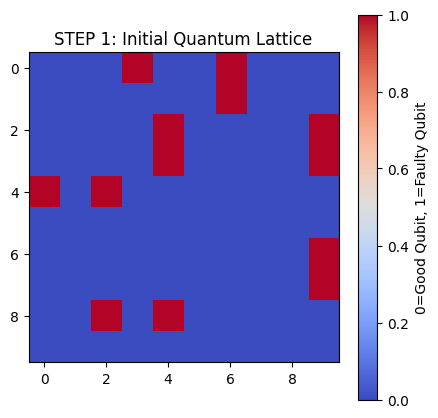


STEP 2: Baseline patch analysis (top-left patch used)...
Baseline patch @ (0, 0):
  Faulty qubits = 1
  Logical error rate ≈ 0.062


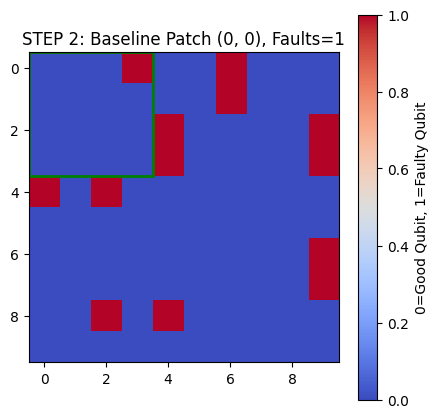


STEP 3: Searching for best patch using programmable matter logic...
Best patch found @ (2, 5):
  Faulty qubits = 0
  Logical error rate ≈ 0.000


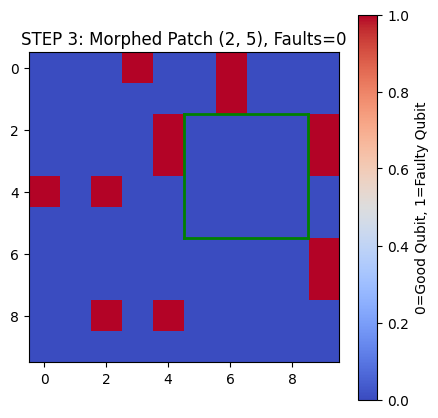


STEP 4: Generating secure morph command via HSM-like signing...
Morph Command: morph_to:2,5|patch_size:4
HSM-like Signature: d98d4793d0e5d1f2a5a7918dc90fff06486e9d1fe0d00d6f65d3ff1ffecf7b09

STEP 5: Saving lattice snapshot for rollback safety...
Snapshot saved to: /content/lattice_snapshot.json
Reloading snapshot for rollback test...
Rollback lattice matches saved snapshot.

STEP 6: Running Monte Carlo simulation to measure statistical improvement...


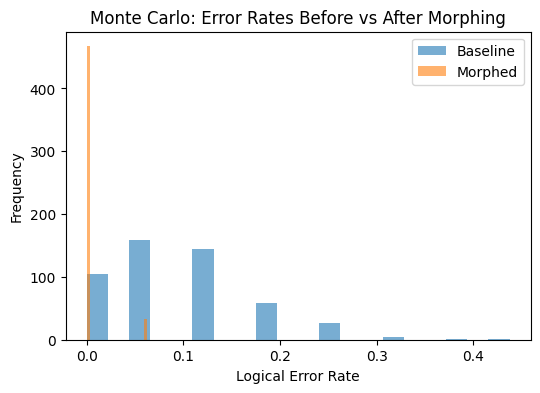


Average Baseline Error Rate: 0.096
Average Morphed Error Rate: 0.004
Relative Improvement: 95.70%

STEP 7: Summary of Benefits
- Automatic rerouting around faulty qubits without physical changes.
- Reduced logical error rates via dynamic morphing.
- Secure morph commands prevent unauthorized changes.
- Snapshots enable safe rollback.
- Proven statistically with Monte Carlo runs.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import hashlib, hmac, json, os

# ---------------------------
# CONFIG
# ---------------------------
GRID_SIZE = 10           # Lattice dimension
PATCH_SIZE = 4           # Logical patch size
FAULT_PROB = 0.1         # Probability a qubit is faulty
MC_RUNS = 500            # Monte Carlo runs for stats
HSM_KEY = b"dummy_cryo_key_for_QAI"  # Dummy cryo-HSM key

# ---------------------------
# Lattice creation
# ---------------------------
def create_lattice(grid_size=GRID_SIZE, fault_prob=FAULT_PROB):
    """0 = good qubit, 1 = faulty qubit"""
    return np.random.choice([0, 1], size=(grid_size, grid_size), p=[1-fault_prob, fault_prob])

# ---------------------------
# Patch search
# ---------------------------
def find_best_patch(lattice, patch_size=PATCH_SIZE):
    best_coords, min_faults = None, float('inf')
    for i in range(GRID_SIZE - patch_size + 1):
        for j in range(GRID_SIZE - patch_size + 1):
            patch = lattice[i:i+patch_size, j:j+patch_size]
            faults = np.sum(patch)
            if faults < min_faults:
                min_faults = faults
                best_coords = (i, j)
    return best_coords, min_faults

# ---------------------------
# Logical error estimator (improved)
# ---------------------------
def logical_error_rate(patch_faults, patch_size=PATCH_SIZE):
    total_qubits = patch_size * patch_size
    # More realistic: error rate proportional to fraction of faulty qubits
    return patch_faults / total_qubits

# ---------------------------
# Morph command signing
# ---------------------------
def sign_command(command_str):
    return hmac.new(HSM_KEY, command_str.encode(), hashlib.sha256).hexdigest()

# ---------------------------
# Visualization: Lattice heatmap
# ---------------------------
def plot_lattice(lattice, patch_coords=None, title="Lattice"):
    plt.figure(figsize=(5,5))
    plt.imshow(lattice, cmap='coolwarm', interpolation='nearest')
    plt.title(title)
    plt.colorbar(label='0=Good Qubit, 1=Faulty Qubit')
    if patch_coords:
        i, j = patch_coords
        # draw patch rectangle
        for x in [j-0.5, j+PATCH_SIZE-0.5]:
            plt.plot([x, x], [i-0.5, i+PATCH_SIZE-0.5], color='green', linewidth=2)
        for y in [i-0.5, i+PATCH_SIZE-0.5]:
            plt.plot([j-0.5, j+PATCH_SIZE-0.5], [y, y], color='green', linewidth=2)
    plt.show()

# ---------------------------
# Monte Carlo simulation
# ---------------------------
def monte_carlo_sim(runs=MC_RUNS):
    baseline_rates = []
    morphed_rates = []
    for _ in range(runs):
        lattice = create_lattice()
        # Baseline: top-left patch
        base_faults = np.sum(lattice[0:PATCH_SIZE, 0:PATCH_SIZE])
        base_err = logical_error_rate(base_faults)
        baseline_rates.append(base_err)
        # Morph: find best patch
        best_coords, best_faults = find_best_patch(lattice)
        best_err = logical_error_rate(best_faults)
        morphed_rates.append(best_err)
    return np.array(baseline_rates), np.array(morphed_rates)

def plot_monte_carlo(baseline_rates, morphed_rates):
    plt.figure(figsize=(6,4))
    plt.hist(baseline_rates, bins=20, alpha=0.6, label="Baseline")
    plt.hist(morphed_rates, bins=20, alpha=0.6, label="Morphed")
    plt.xlabel("Logical Error Rate")
    plt.ylabel("Frequency")
    plt.title("Monte Carlo: Error Rates Before vs After Morphing")
    plt.legend()
    plt.show()

# ---------------------------
# Snapshot + rollback (simulated)
# ---------------------------
def save_snapshot(lattice, filename="lattice_snapshot.json"):
    with open(filename, "w") as f:
        json.dump(lattice.tolist(), f)
    return os.path.abspath(filename)

def load_snapshot(filename):
    with open(filename, "r") as f:
        return np.array(json.load(f))

# ---------------------------
# QAI Processor Prototype Run (Step-by-Step)
# ---------------------------
print("=== QAI Processor Prototype: Step-by-Step ===")

# Step 1: Initial lattice creation
print("\nSTEP 1: Creating initial quantum lattice with random faulty qubits...")
lattice = create_lattice()
print("Initial lattice created.")
plot_lattice(lattice, title="STEP 1: Initial Quantum Lattice")

# Step 2: Baseline patch analysis
print("\nSTEP 2: Baseline patch analysis (top-left patch used)...")
baseline_patch = (0, 0)
baseline_faults = np.sum(lattice[0:PATCH_SIZE, 0:PATCH_SIZE])
baseline_error = logical_error_rate(baseline_faults)
print(f"Baseline patch @ {baseline_patch}:")
print(f"  Faulty qubits = {baseline_faults}")
print(f"  Logical error rate ≈ {baseline_error:.3f}")
plot_lattice(lattice, patch_coords=baseline_patch,
             title=f"STEP 2: Baseline Patch {baseline_patch}, Faults={baseline_faults}")

# Step 3: Best patch search (programmable matter morphing)
print("\nSTEP 3: Searching for best patch using programmable matter logic...")
best_coords, best_faults = find_best_patch(lattice)
best_error = logical_error_rate(best_faults)
print(f"Best patch found @ {best_coords}:")
print(f"  Faulty qubits = {best_faults}")
print(f"  Logical error rate ≈ {best_error:.3f}")
plot_lattice(lattice, patch_coords=best_coords,
             title=f"STEP 3: Morphed Patch {best_coords}, Faults={best_faults}")

# Step 4: Secure morph command
print("\nSTEP 4: Generating secure morph command via HSM-like signing...")
morph_cmd = f"morph_to:{best_coords[0]},{best_coords[1]}|patch_size:{PATCH_SIZE}"
signature = sign_command(morph_cmd)
print(f"Morph Command: {morph_cmd}")
print(f"HSM-like Signature: {signature}")

# Step 5: Snapshot and rollback test
print("\nSTEP 5: Saving lattice snapshot for rollback safety...")
snapshot_path = save_snapshot(lattice)
print(f"Snapshot saved to: {snapshot_path}")
rolled_back_lattice = load_snapshot(snapshot_path)
print("Reloading snapshot for rollback test...")
if np.array_equal(lattice, rolled_back_lattice):
    print("Rollback lattice matches saved snapshot.")
else:
    print("Rollback mismatch detected!")

# Step 6: Monte Carlo statistical improvement test
print("\nSTEP 6: Running Monte Carlo simulation to measure statistical improvement...")
baseline_rates, morphed_rates = monte_carlo_sim()
plot_monte_carlo(baseline_rates, morphed_rates)
avg_base = np.mean(baseline_rates)
avg_morph = np.mean(morphed_rates)
improvement = (avg_base - avg_morph) / avg_base * 100
print(f"\nAverage Baseline Error Rate: {avg_base:.3f}")
print(f"Average Morphed Error Rate: {avg_morph:.3f}")
print(f"Relative Improvement: {improvement:.2f}%")

# Step 7: Benefits summary
print("\nSTEP 7: Summary of Benefits")
print("- Automatic rerouting around faulty qubits without physical changes.")
print("- Reduced logical error rates via dynamic morphing.")
print("- Secure morph commands prevent unauthorized changes.")
print("- Snapshots enable safe rollback.")
print("- Proven statistically with Monte Carlo runs.")


**Concept and execution by Bhadale IT, code gnerated by ChatGPT**